# Requirenments:

###### 1.Which accounts are the most active?
###### 2.What activities make them active?
###### 3.Where do inactive accounts get stuck?
###### 4.How can you classify accounts as “successful” or not?
###### 5.What activities would an account most likely do once they have done an activity?



In [ ]:
import numpy
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [ ]:
df = pd.read_csv("sample_activity_data_2.csv")

In [ ]:
df.head()

,timestamp,account_id,activity
0,1696751803000,aaeeea80-f049-48e3-be17-77d530d30c12,Created User
1,1696751803000,05dc7b9f-7266-42ea-adc4-27cb55846316,Created User
2,1696751803000,f3073035-08c6-c1c4-b5af-d79ec481b920,Clicked Help
3,1696751803000,a5d04d75-2191-4cb2-a6d6-c913940d9464,Created User
4,1696751803000,065787b5-0a83-4609-adf9-31aae77c2636,Created User


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18704 entries, 0 to 18703
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   timestamp   18704 non-null  int64 
 1   account_id  18704 non-null  object
 2   activity    18704 non-null  object
dtypes: int64(1), object(2)
memory usage: 438.5+ KB


In [ ]:

print("number of users",df['account_id'].nunique())

number of users 46


In [ ]:
# Get unique values and their frequencies in a particular column
column_name = 'activity'
unique_values = df[column_name].unique()
value_counts = df[column_name].value_counts()

# Display the unique values and their frequencies
print("Unique Values in {}:".format(column_name))
print(unique_values)

print("\nFrequency of Each Value in {}:".format(column_name))
print(value_counts)

Unique Values in activity:
['Created User' 'Clicked Help' 'Issues' 'Created Account' 'Repositories'
 'Projects' 'Pull Requests' 'Account Registered' 'Update User Role'
 'User Login' 'Repository Watched' 'Ci Cd Runs' 'Repository Starred'
 'Pages']

Frequency of Each Value in activity:
Clicked Help          6438
Update User Role      6400
Pages                 2526
Repositories          1064
Issues                 563
Pull Requests          431
Created User           389
User Login             338
Projects               238
Ci Cd Runs             110
Repository Watched      59
Repository Starred      56
Created Account         46
Account Registered      46
Name: activity, dtype: int64


# 1. which accounts are most active:

In [ ]:

# function to get most active account_ids:
def active_accounts(df):
    # Print the mean threshold
    threshold_mean = df['account_id'].value_counts().mean()
    print("Mean Threshold:", threshold_mean)

    # Return the most active accounts
    activity_counts = df.groupby('account_id').count()['activity']
    most_active_accounts = activity_counts[activity_counts > threshold_mean]
    return most_active_accounts


# function to get the most inactive account_ids:
def inactive_accounts(df):
    # Print the mean threshold
    threshold_mean = df['account_id'].value_counts().mean()
    print("Mean Threshold:", threshold_mean)

    # Return the most inactive accounts
    activity_counts = df.groupby('account_id').count()['activity']
    most_inactive_accounts = activity_counts[activity_counts < threshold_mean]
    return most_inactive_accounts




In [ ]:
most_active_accounts = active_accounts(df)

print("\nMost Active Accounts:")
print(most_active_accounts)

Mean Threshold: 406.60869565217394

Most Active Accounts:
account_id
03d8624c-6776-43fc-a240-e05d8f34e1e6    1377
11df4524-3dea-4b2b-9c23-03cabab47f6b    1395
15a67313-b127-4aa9-ba57-84607fd0685b    1454
162c197d-11fa-45ea-9e53-10b9f6352eed     630
195d9f1b-3377-4b1c-8574-add42fc62049     795
52e2c214-a7e9-44a1-8f9c-b7b8d4b839b3    1413
53a3f2ee-a82d-4b73-b04d-bacd55d2af69    1475
69bd3c60-3f9b-4f5b-9863-52592d52794c    1333
7366d65c-87ce-45f7-a18f-1c35b05c60e2    1293
7bbc26ce-44ed-4770-a25e-efec478a89da    1363
c49a998f-190f-4e7b-8bc6-291d14b00ff2    1141
dac3ab74-820b-49b2-b229-edfab137f6fb    1258
dd150318-0611-f564-c846-3376d04f43a4    1042
eb69599a-b198-a7ea-ef04-dbfcf2cb93f0     455
f3073035-08c6-c1c4-b5af-d79ec481b920     901
Name: activity, dtype: int64


In [ ]:
most_inactive_accounts = inactive_accounts(df)
print("\nMost Inactive Accounts:")
print(most_inactive_accounts)

Mean Threshold: 406.60869565217394

Most Inactive Accounts:
account_id
05dc7b9f-7266-42ea-adc4-27cb55846316     45
065787b5-0a83-4609-adf9-31aae77c2636     85
0d8988e3-6532-47b1-a8c1-fb0911799e6a     62
1d8653cc-6c40-4168-9a75-f62589eb3a11     18
1e5e0138-5b72-485d-a382-95efeeac613e     19
1ff5bd9a-03cb-44a3-9d6f-1a38e01295aa     66
2a77a583-c6cf-4408-83d5-5c565ef7c1e5     53
2fa4466e-08c1-e137-ae20-ec30ec5930d6      4
3b492884-2dcb-49ed-aff1-e16afa7b029d     12
43525317-f756-497b-aa4e-6e199ef66d03     49
629a53ba-6281-4bd0-ab4a-36e290f88423     50
6a47e03f-cbb0-41ea-a804-95013d21dddd     35
6f0d5154-320c-43ba-b49c-c7819b3910e1     52
78845502-926f-4e1a-ac0a-547a84feccc9     56
7c291cc7-f89a-27ec-fe7a-14b6d99e94e5     20
7f81a6e4-6982-4406-8960-b28b5b5eca14      9
80723f39-755d-4902-a69b-6531dc40fcc9     38
9456a1d4-4122-a0f3-d323-dcf2e6e602a5     16
96b0a41f-c736-46f0-b7e6-5a5cad2cf413     23
a0053c94-458f-4f43-8b14-3af462c61bbe     28
a0308890-a976-fd74-3da4-849c5723479a     14
a5d04

# 2. what activities make most active users active:

In [ ]:
# function to plot to see any particular user's activity vs timestamp:

def plot_activities_timestamp(df, account_id):
    plt.figure(figsize=(12, 6))

    activity_types = ['Created User', 'Clicked Help', 'Issues', 'Repositories',
                      'Projects', 'Pull Requests', 'Update User Role',
                      'User Login', 'Repository Watched', 'Ci Cd Runs', 'Repository Starred',
                      'Pages']

    colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown',  'magenta', 'yellow', 'black', 'lime', 'indigo']

    for activity, color in zip(activity_types, colors):
        activity_data = df[(df['account_id'] == account_id) & (df['activity'] == activity)]
        plt.scatter(activity_data['timestamp'], [activity]*len(activity_data), color=color, label=activity)

    plt.title(f'Activities for Account ID: {account_id}')
    plt.xlabel('Timestamp')
    plt.ylabel('Activity')
    plt.legend()
    plt.show()

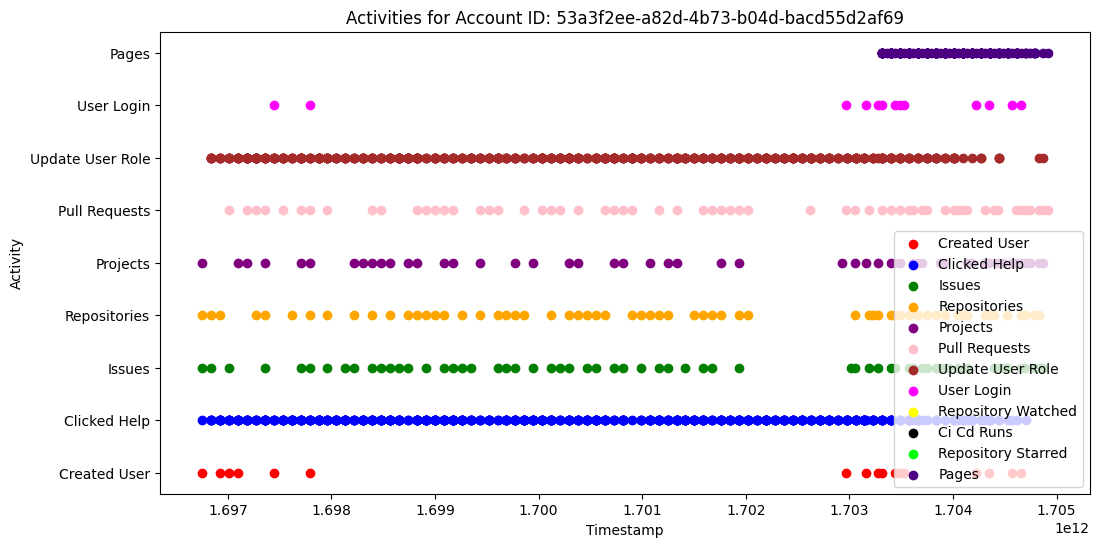

In [ ]:
# Example usage
plot_activities_timestamp(df, '53a3f2ee-a82d-4b73-b04d-bacd55d2af69')

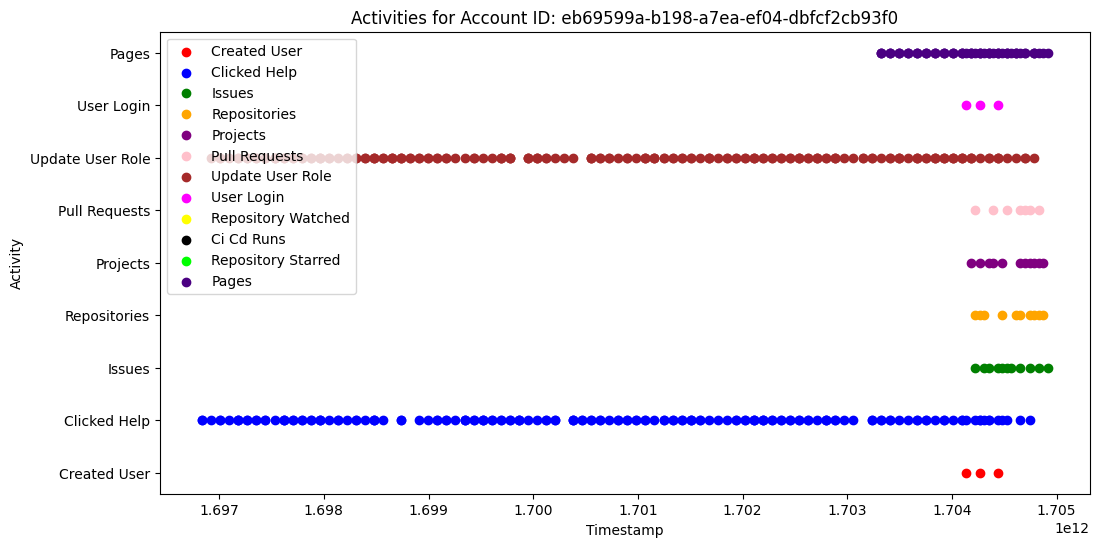

In [ ]:
# Example usage
plot_activities_timestamp(df, 'eb69599a-b198-a7ea-ef04-dbfcf2cb93f0')

In [ ]:
# Filter the data to include only the most active accounts
df_active_users = df[df['account_id'].isin(most_active_accounts.index)]



In [ ]:
# function to get the most common activities most users do:
def get_most_common_activities(df):


    # Group the data by activity and count the number of times each activity was performed
    activity_counts = df.groupby('activity').count()['account_id']

    # Sort the activities by count in descending order
    most_common_activities = activity_counts.sort_values(ascending=False).head(5)

    most_common_activities_df = pd.DataFrame({'activity': most_common_activities.index, 'count': most_common_activities.values})
    return most_common_activities_df


In [ ]:
# Filter the data to include only the most active accounts
df_active_users = df[df['account_id'].isin(most_active_accounts.index)]
gh = get_most_common_activities(df_active_users)
gh

,activity,count
0,Clicked Help,6343
1,Update User Role,6314
2,Pages,2465
3,Repositories,672
4,Issues,438


###### Conclusion:
From above results we can say that the activities which are most common in the most active users are the activities which make are users active.

In [ ]:
# function to plot the all the activities of the users vs time

def plot_activity_by_timestamp(df, most_active_accounts):
    # Filter the data to include only the most active accounts
    df_active_user = df[df['account_id'].isin(most_active_accounts.index)]

    # Group the data by timestamp and activity and count the number of times each activity was performed
    activity_counts = df_active_user.groupby(['timestamp', 'activity']).count()['account_id']

    # Unstack the data to create a pivot table
    activity_counts = activity_counts.unstack()

    # Get the rainbow colors
    colors = list(mcolors.TABLEAU_COLORS.values())

    # Plot the data
    activity_counts.plot(kind='line', color=colors)
    plt.title('Activity by Timestamp for Most Active Users')
    plt.xlabel('Timestamp')
    plt.ylabel('Count')
    plt.show()


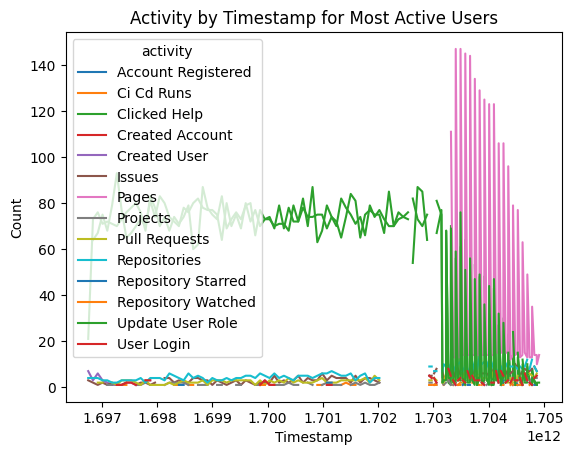

In [ ]:
# Plot the activity by timestamp for the most active users
plot_activity_by_timestamp(df, most_active_accounts)

From above graph also we can clearly see that the clicked help, pages and update user role are the most done activities.

# 3. Where inactive accounts get stuck:

In [ ]:
# Filter the data to include only the most inactive accounts
df_inactive_users = df[df['account_id'].isin(most_inactive_accounts.index)]

df_inactive_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 18693
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   timestamp   1379 non-null   int64 
 1   account_id  1379 non-null   object
 2   activity    1379 non-null   object
dtypes: int64(1), object(2)
memory usage: 43.1+ KB


In [ ]:

# function to get the count of last activities done by users:
def last_activity(df):

    # Group the data by account_id and get the last activity performed by each account
    last_activities = df.groupby('account_id').last()['activity']

    # Count the number of accounts that got stuck at each activity
    stuck_counts = last_activities.value_counts()

    # Print the activities where accounts got stuck
    print(stuck_counts)

In [ ]:
last_activity(df_inactive_users)

Created User          9
Repositories          8
Issues                6
Pull Requests         5
User Login            1
Repository Starred    1
Projects              1
Name: activity, dtype: int64


In [ ]:
last_activity(df_active_users)

Pages           8
Repositories    5
Issues          2
Name: activity, dtype: int64


1. most inactive accounts stuck after (created user), can be done something to engage the user.

2. active accounts visited (pages), which inactive users didn't, can be done somthing to make new users aware of this feature.

3. (pull requests), may be we can make this activity more easy or efficient for the users.



# 4. How can you classify accounts as “successful” or not:

In [ ]:
import pandas as pd

def get_successful_accounts(data):
    # Convert timestamp to datetime
    # data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')

    # Calculate the number of activities per account
    activity_counts = data['account_id'].value_counts()

    # Calculate the frequency of activities (i.e., number of activities per unit of time)
    data['date'] = data['timestamp'].dt.date
    activity_frequency = data.groupby(['account_id', 'date']).size().groupby('account_id').mean()

    # Define a threshold for what you consider a "successful" account
    activity_count_threshold = activity_counts.mean()  # Mean of the activity counts
    activity_frequency_threshold = activity_frequency.mean()  # Mean of the activity frequency

    # Classify the accounts based on the thresholds
    successful_accounts = set(activity_counts[activity_counts > activity_count_threshold].index) & set(activity_frequency[activity_frequency > activity_frequency_threshold].index)

    return successful_accounts

def get_unsuccessful_accounts(data, successful_accounts):
    all_accounts = set(data['account_id'].unique())
    unsuccessful_accounts = all_accounts - successful_accounts
    return unsuccessful_accounts


In [ ]:

successful_accounts = get_successful_accounts(df)
print(f"Successful accounts: {successful_accounts}")


Successful accounts: {'15a67313-b127-4aa9-ba57-84607fd0685b', '7366d65c-87ce-45f7-a18f-1c35b05c60e2', 'dac3ab74-820b-49b2-b229-edfab137f6fb', '69bd3c60-3f9b-4f5b-9863-52592d52794c', 'dd150318-0611-f564-c846-3376d04f43a4', 'c49a998f-190f-4e7b-8bc6-291d14b00ff2', '53a3f2ee-a82d-4b73-b04d-bacd55d2af69', '11df4524-3dea-4b2b-9c23-03cabab47f6b', '52e2c214-a7e9-44a1-8f9c-b7b8d4b839b3', '7bbc26ce-44ed-4770-a25e-efec478a89da', 'f3073035-08c6-c1c4-b5af-d79ec481b920', '195d9f1b-3377-4b1c-8574-add42fc62049', '162c197d-11fa-45ea-9e53-10b9f6352eed', '03d8624c-6776-43fc-a240-e05d8f34e1e6'}


In [ ]:
unsuccessful_accounts = get_unsuccessful_accounts(df, successful_accounts)
print(f"Unsuccessful accounts: {unsuccessful_accounts}")

Unsuccessful accounts: {'bbfe1233-454a-6c6b-1f8d-c17c74660f31', 'a878c9c8-d46a-4d0a-83c3-19e62f5defed', 'a5d04d75-2191-4cb2-a6d6-c913940d9464', 'bd353506-1132-446d-adca-10589f2ad5b6', '065787b5-0a83-4609-adf9-31aae77c2636', '6a47e03f-cbb0-41ea-a804-95013d21dddd', '1ff5bd9a-03cb-44a3-9d6f-1a38e01295aa', '629a53ba-6281-4bd0-ab4a-36e290f88423', '6f0d5154-320c-43ba-b49c-c7819b3910e1', '7c291cc7-f89a-27ec-fe7a-14b6d99e94e5', 'c0881e00-6a2f-b6e4-413b-abc2d3822d3b', 'a0053c94-458f-4f43-8b14-3af462c61bbe', 'aaeeea80-f049-48e3-be17-77d530d30c12', '78845502-926f-4e1a-ac0a-547a84feccc9', '05dc7b9f-7266-42ea-adc4-27cb55846316', 'a0308890-a976-fd74-3da4-849c5723479a', 'ad915236-a89b-4378-8b87-b4a86d37abbd', '80723f39-755d-4902-a69b-6531dc40fcc9', 'eb69599a-b198-a7ea-ef04-dbfcf2cb93f0', '7f81a6e4-6982-4406-8960-b28b5b5eca14', '96b0a41f-c736-46f0-b7e6-5a5cad2cf413', '9456a1d4-4122-a0f3-d323-dcf2e6e602a5', '1d8653cc-6c40-4168-9a75-f62589eb3a11', '2a77a583-c6cf-4408-83d5-5c565ef7c1e5', 'f1099a9f-f992-4

# 5. What activities would an account most likely do once they have done an activity:

In [ ]:
import numpy as np
from keras.models import Model
from keras.layers import LSTM, Dense, Input, Embedding, concatenate
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model

###### used LSTM for predicting next activity, given a account_id, timestamp and the current activity:

In [ ]:


# Preprocess the data
tokenizer = Tokenizer(filters='')  # Do not split the text
tokenizer.fit_on_texts(df['activity'])
sequences = tokenizer.texts_to_sequences(df['activity'])
vocab_size = len(tokenizer.word_index) + 1

# Prepare the data for the LSTM
sequences = [np.array(sequence) for sequence in sequences if len(sequence) > 1]

if len(sequences) > 0:
    X_activity, y = [sequence[:-1] for sequence in sequences], [sequence[-1] for sequence in sequences]
    y = to_categorical(y, num_classes=vocab_size)

    # Pad sequences so they all have the same length
    X_activity = pad_sequences(X_activity)

    # Encode account_id
    le = LabelEncoder()
    df['account_id_encoded'] = le.fit_transform(df['account_id'])
    X_account_id = df['account_id_encoded'].values[:len(X_activity)]
    X_account_id = np.array([np.array(x) for x in X_account_id])

    # Scale timestamp
    df['timestamp_scaled'] = df['timestamp'] / df['timestamp'].max()
    X_timestamp = df['timestamp_scaled'].values[:len(X_activity)]
    X_timestamp = np.array([np.array(x) for x in X_timestamp])

    # Define the LSTM model
    activity_input = Input(shape=(None, 1))
    activity_model = LSTM(50)(activity_input)

    account_id_input = Input(shape=(1,))
    account_id_model = Dense(10, activation='relu')(account_id_input)

    timestamp_input = Input(shape=(1,))
    timestamp_model = Dense(10, activation='relu')(timestamp_input)

    concat = concatenate([activity_model, account_id_model, timestamp_model])
    output = Dense(vocab_size, activation='softmax')(concat)

    model = Model(inputs=[activity_input, account_id_input, timestamp_input], outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit([X_activity, X_account_id, X_timestamp], y, epochs=100, verbose=0)




In [ ]:
# Save the model
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model
loaded_model = load_model('my_model.h5')

In [ ]:
# Define a prediction function
def predict_next_activity(account_id, timestamp, current_activity):
        encoded_current_activity = tokenizer.texts_to_sequences([current_activity])[0]
        encoded_current_activity = np.array(encoded_current_activity).reshape(1, -1)
        encoded_account_id = le.transform([account_id]).reshape(-1, 1)
        scaled_timestamp = np.array([timestamp / df['timestamp'].max()]).reshape(-1, 1)
        predicted_activity = loaded_model.predict([encoded_current_activity, encoded_account_id, scaled_timestamp], verbose=0)
        # Convert the predicted activity to a list of sequences
        predicted_activity = [np.argmax(predicted_activity, axis=-1)]
        return tokenizer.sequences_to_texts(predicted_activity)[0]


In [ ]:
# Define the account_id, timestamp, and current_activity
account_id = 'aaeeea80-f049-48e3-be17-77d530d30c12'
timestamp = 1696751803000
current_activity = 'Created User'

# Call the function
next_activity = predict_next_activity(account_id, timestamp, current_activity)

# Print the result
print(f"The most likely next activity is: {next_activity}")


The most likely next activity is: role


In [ ]:
# Define the account_id, timestamp, and current_activity
account_id = '69bd3c60-3f9b-4f5b-9863-52592d52794c'
timestamp = 1696751803000
current_activity = 'Issues'

# Call the function
next_activity = predict_next_activity(account_id, timestamp, current_activity)

# Print the result
print(f"The most likely next activity is: {next_activity}")


The most likely next activity is: registered



### NOTE:
The LSTM model is working fine when the next predicted activity is of one word, but when next predicted activity consists of more than one word it is only predicting last word of it.

Improvement can be done:
1. Increasing the training data and maybe pattern also.
2. Can be done something with the tokeniser.
3. A different tranformer model used for text generation can be used and fine tuned on our data.